11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Feature shape: (784,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7935 - loss: 0.7282 - val_accuracy: 0.9485 - val_loss: 0.1792
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9529 - loss: 0.1636 - val_accuracy: 0.9633 - val_loss: 0.1249
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9716 - loss: 0.0995 - val_accuracy: 0.9654 - val_loss: 0.1143
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9792 - loss: 0.0713 - val_accuracy: 0.9739 - val_loss: 0.0889
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9847 - loss: 0.0529 - val_accuracy: 0.9729 - val_loss: 0.0908
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9880 - loss: 0.0422 - val_accuracy: 0.9752 - val_loss: 0.0843
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9921 - loss: 0.0300 - val_accuracy: 0.9766 - val_loss: 0.0806
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9933 - loss: 0.0243 - val_accu

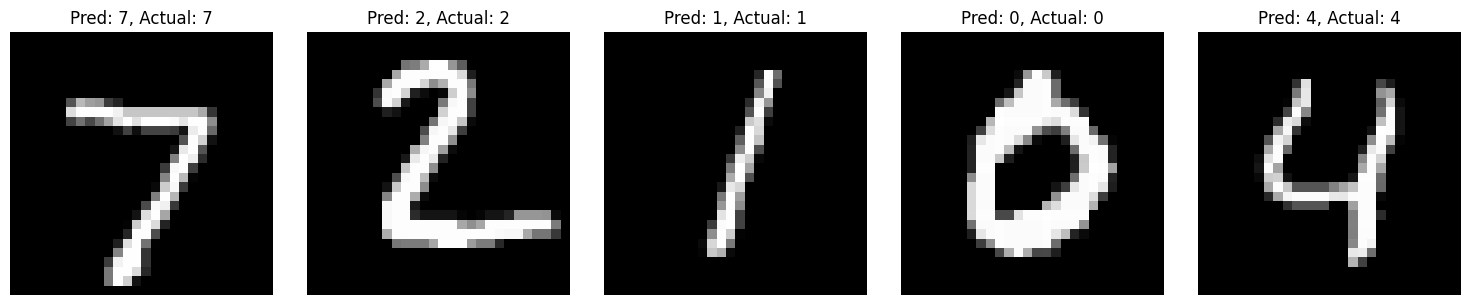

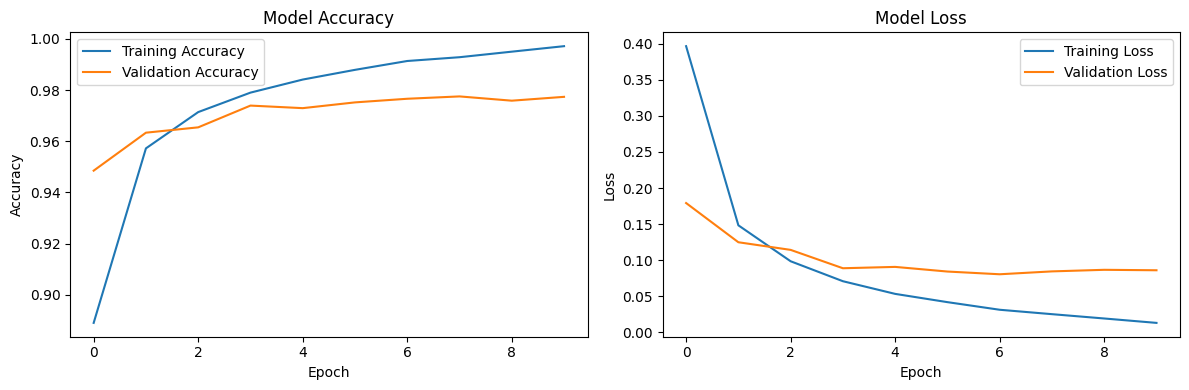

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Data preprocessing
feature_vector_length = 784
num_classes = 10

# Fix: input_shape should be a tuple, not an integer
input_shape = (feature_vector_length,)  # Added comma to make it a tuple

print(f'Feature shape: {input_shape}')

# Reshape the data
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert labels to categorical one-hot encoding
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Build the model
model = Sequential()
# Fix: input_shape parameter should match the tuple format
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Evaluate the model
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]:.4f} - Accuracy: {test_results[1]:.4f}')

# Make predictions and visualize
predictions = model.predict(X_test[:5])
predicted_classes = np.argmax(predictions, axis=1)

# Fix: Y_test is already one-hot encoded, so we need to get the original labels
# Since we used to_categorical, we can get the original labels by argmax
true_classes = np.argmax(Y_test[:5], axis=1)

# Create a figure with subplots instead of showing individual plots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Pred: {predicted_classes[i]}, Actual: {true_classes[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Alternative: Show training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()